# What is Template Matching?

![ Template_Matching](screenshot1.png)

- The simplest form of object dectection
- You should already have the EXACT image ur looking for (_which kinda defeats the purpose of object detection but it's the simplest method anyway so..._)

## THE BASIC IDEA

1. Takes in the full/ larger image
2. Scans the img to find where it thinks is the template matching for the wanted region BASED OFF of the methods you provided (those Maths eq- largely Statistics)

Extra info I found online...
- Slide the template over the larger image

- On the overlapping region, find the difference btw the template and the actual image (You can come up with a definition for 'how much is "different"?'. 

- Wherever that diff is _really_ small => you've found the template !

![ Template_Matching_formula](screenshot2.png)

--> The formula above is the 'Sum of Square Differences' formula

**It's actually simpler than it looks, you just take the diff between the template t(m-i, n-j) and the image f(m,n), square ^2 them and add them up (sigma m and sigma n)**

**_Lots of valuable info can be found here in this ytb video (time: 1:40) [https://www.youtube.com/watch?v=1_hwFc8PXVE]_**

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

In [9]:
full.shape

(1367, 1025, 3)

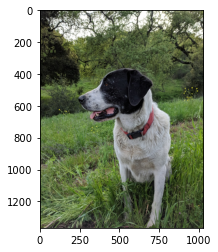

In [10]:
plt.imshow(full)

In [5]:
##  UPLOAD A TEMPLATE IMAGE: A SUBSET OF THE LARGER IMG UR SEARCHING

In [6]:
face = cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

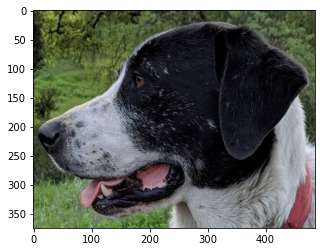

In [7]:
plt.imshow(face)

In [8]:
face.shape

(375, 486, 3)

---> **_This is the EXACT shape of the dog's face in the larger image_**

-------------  
-------------

In [12]:
# The Full Image to Search
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


# The Template to Match
face= cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

**--> So the last two methods on the list above works diff, which finds the MINIMUM values - using sth called 'Square difference'**

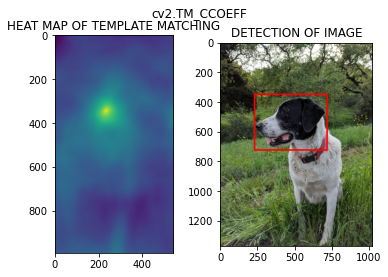

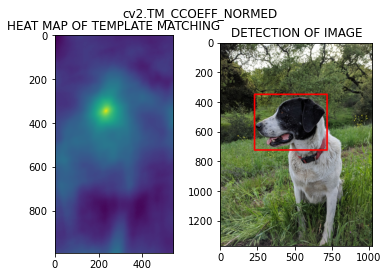

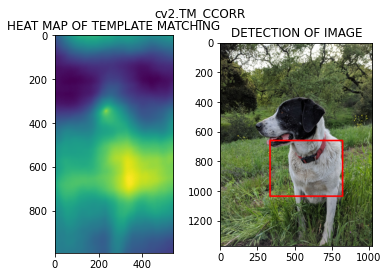

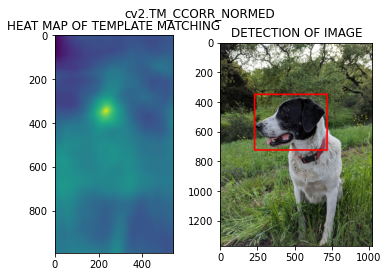

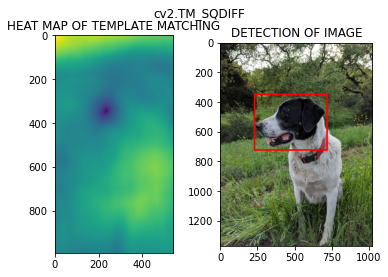

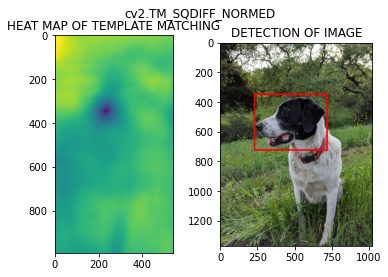

In [21]:
for m in methods:
    
    # CREATE A COPY OF THE FULL IMG
    full_copy = full.copy()
    
    method = eval(m)
    
    # TEMPLATE MATCHING
    res = cv2.matchTemplate(full_copy, face, method)
    
    # GRAB MIN/MAX VALUE FROM THAT HEAT PACK => needs tuple unpacking
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:    #note that these last 2 methods return MIN value, not max, hence the min_loc 
        top_left = min_loc   # (x,y)
    else:
        top_left = max_loc
     
    # Tuple-unpacking the shape of the template... 
    height, width, channels = face.shape
    
    
    # DRAW THE RECTANGLE BASED ON THE LOCATION FOUND 
    bottom_right = (top_left[0] + width, top_left[1]+height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 10)
    
    
    # PLOT AND SHOW
    
    plt.subplot(121)   # 1 row - 2 collumn
    plt.imshow(res)
    plt.title('HEAT MAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF IMAGE')
    
    # TITLE EVERYTHING WITH THE METHOD USED 
    plt.suptitle(m)    # m is the list of string above. This is a 'super title' == title ABOVE all the other titles 
    
    # avoid subplot() overidding each other
    plt.show()
    
    print('\n')
    print('\n')

In [14]:
   
    res = cv2.matchTemplate(full_copy, face, eval('cv2.TM_CCOEFF') )

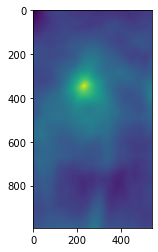

In [16]:
plt.imshow(res)   # A HEAT MAP

#### --> IT HIGHLY DEPENDS ON THE METHOD BEING USED EVEN IF YOU FOUND THE EXACT CARBON-COPY OF THE IMAGE, SUCH AS THE CCORR METHOD WHICH INCORRECTLY DETECT THE DOG'S FACE AS SHOWN ####